$$\newcommand{\xv}{\mathbf{x}}
\newcommand{\Xv}{\mathbf{X}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\Yv}{\mathbf{Y}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Wv}{\mathbf{W}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\betav}{\mathbf{\beta}}
\newcommand{\gv}{\mathbf{g}}
\newcommand{\Hv}{\mathbf{H}}
\newcommand{\dv}{\mathbf{d}}
\newcommand{\Vv}{\mathbf{V}}
\newcommand{\vv}{\mathbf{v}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\Tv}{\mathbf{T}}
\newcommand{\Sv}{\mathbf{S}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\Zv}{\mathbf{Z}}
\newcommand{\Norm}{\mathcal{N}}
\newcommand{\muv}{\boldsymbol{\mu}}
\newcommand{\sigmav}{\boldsymbol{\sigma}}
\newcommand{\phiv}{\boldsymbol{\phi}}
\newcommand{\Phiv}{\boldsymbol{\Phi}}
\newcommand{\Sigmav}{\boldsymbol{\Sigma}}
\newcommand{\Lambdav}{\boldsymbol{\Lambda}}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\argmax}[1]{\underset{#1}{\operatorname{argmax}}}
\newcommand{\argmin}[1]{\underset{#1}{\operatorname{argmin}}}
\newcommand{\dimensionbar}[1]{\underset{#1}{\operatorname{|}}}
\newcommand{\dimensionbar}[1]{\underset{#1}{\operatorname{|}}}
\newcommand{\grad}{\mathbf{\nabla}}
\newcommand{\ebx}[1]{e^{\wv_{#1}^T \xv_n}}
\newcommand{\eby}[1]{e^{y_{n,#1}}}
\newcommand{\Tiv}{\mathbf{Ti}}
\newcommand{\Fv}{\mathbf{F}}
\newcommand{\ones}[1]{\mathbf{1}_{#1}}
$$

<div align="center"><font size=6>Data Likelihood Optimization</font></div>

We have been doing gradient descent on the MSE (mean-squared error) between our target indicator variables and the softmax outputs of our classification model to iteratively update the weight values for our classification model.  In the last class we discussed how doing gradient ascent on the likelihood of our training data results in the same algorithm for updating the weights!

In this notebook the details of deriving the gradient of the data likelihood are shown.

First we define the data likelihood, $L(w)$. 

# Data Likelihood

Let $C$ be a random variable that can have any value from our set of class names, and $t_{n,k}$ the value of the indicator variable, which is 0 or 1, for sample $n$ and class $k$. The likelihood is just the product of all $P(C=\text{class of }
n^\text{th}\text{ sample}\,|\,\xv_n)$ values
for sample $n$.  A common way to express this product, using those handy indicator variables is

$$
    \begin{align*}
      L(\wv) = \prod_{n=1}^N \prod_{k=1}^K P(C=k\,|\, \xv_n)^{t_{n,k}}
    \end{align*}
$$


Say we have three classes ($K=3$) and training sample $n$ is from Class 2, then the  product is

$$
      \begin{align*}
        P(C=1\,|\,\xv_n)^{t_{n,1}} P(C=2\,|\,\xv_n)^{t_{n,2}}
        P(C=3\,|\,\xv_n)^{t_{n,3}} & = 
         P(C=1\,|\,\xv_n)^0 P(C=2\,|\,\xv_n)^1 P(C=3\,|\,\xv_n)^0 \\
        & = 1\; P(C=2\,|\,\xv_n)^1 \; 1 \\
        & = P(C=2\,|\,\xv_n) 
      \end{align*}
$$

This shows how the indicator variables as exponents select the correct terms to be included in the product.

## Maximizing the Data Likelihood

So, we want to find $\wv$ that maximizes the data likelihood.  How shall we proceed?

$$
    \begin{align*}
      L(\wv) & = \prod_{n=1}^N \prod_{k=1}^K P(C=k\,|\, \xv_n) ^ {t_{n,k}}
    \end{align*}
$$


Right.  Find the derivative with respect to each component of $\wv$, or the gradient with respect to $\wv$.  But there is
a mess of products in this. So...

Right again.  Work with the natural logarithm  $\log L(\wv)$ which we will call $LL(\wv)$.

$$
    \begin{align*}
      LL(\wv) = \log L(\wv) = \sum_{n=1}^N \sum_{k=1}^K t_{n,k}  \log P(C=k\,|\,\xv_n)
    \end{align*}
$$

Now we need to perform gradient ascent on $LL(\wv)$. (Why "ascent"?)

  * Initialize $\wv$ to some value.
  * Make small change to $\wv$ in the direction of the  gradient of $LL(\wv)$ with respect to $\wv$  (or $\grad_{\wv} LL(\wv)$)
  * Repeat above step for some number of iterations.

$$
      \begin{align*}
        \wv \leftarrow \wv + \rho \grad_{\wv} LL(\wv)
      \end{align*}
$$

where $\rho$ is a constant that affects the step size.

Let's assume we will approximate $P(C=k|\xv_n)$ with a softmax function applied to the output of a linear function, which is the same as a neural network with no hidden layers. In this case, $\wv$ is a matrix of columns corresponding to the weight values required for each class, of which there are $K$.

Let's name our model function $p$, so its value for the $k^{th}$ class is $p_k(\xv_n) = P(C=k|\xv_n)$ and this function is paramaterized by $\wv$. Now we can get started on deriving the gradient, remembering that $\frac{\partial \log f(x)}{\partial x} = \frac{1}{f(x)}\frac{\partial f(x)}{x}$.

$$
      \begin{align*}
      LL(\wv) & = \sum_{n=1}^N \sum_{k=1}^K  t_{n,k} \log P(C=k\,|\,\xv_n)\\
      & = \sum_{n=1}^N \sum_{k=1}^K t_{n,k} \log p_k(\xv_n)\\
      \grad_{\wv_j} LL(\wv) & = \sum_{n=1}^N \sum_{k=1}^K
      \frac{t_{n,k}}{p_k(\xv_n)} \grad_{\wv_j} p_k(\xv_n)
      \end{align*}
$$

To continue we need to define $p_k(\xv_n)$.  This will the result of the softmax function applied to the output of our linear model, so

$$
    \begin{align*}
      p_k(\xv_n) & = \frac{\ebx{k}}{\sum_{m=1}^{K} \ebx{m}}
    \end{align*}
$$

Now we can work on $\grad_{\wv_j} p_k(\xv_n)$.

$$
    \begin{align*}
      \grad_{\wv_j} p_k(\xv_n) & = \grad_{\wv_j} \left (\frac{\ebx{k}}{\sum_{m=1}^{K} \ebx{m}} \right )\\
    & = \grad_{\wv_j} \left [ \left (\sum_{m=1}^{K} \ebx{m} \right )^{-1} \ebx{k} \right ] 
    \end{align*}
$$

We will use the product rule for this.  First, the gradient for the second term is

$$
\begin{align*}
\grad_{\wv_j} \ebx{k} &= \begin{cases}
\xv_n \ebx{k}, & \text{if }\; k=j\\
0 & \text{otherwise}
\end{cases}
\end{align*}
$$
and for the first time it is
$$
\begin{align*}
\grad_{\wv_j} \left (\sum_{m=1}^{K} \ebx{m} \right )^{-1} &= - \left (\sum_{m=1}^{K} \ebx{m} \right )^{-2}  \xv_n \ebx{j}
\end{align*}
$$
then
$$
    \begin{align*}
      \grad_{\wv_j} p_k(\xv_n) & = \grad_{\wv_j} \left (\frac{\ebx{k}}{\sum_{m=1}^{K} \ebx{m}} \right )\\
    & = \left [ -1 \left (\sum_{m=1}^{K} \ebx{m} \right )^{-2} \xv_n \ebx{j} \right ]
    \ebx{k} + \left (\sum_{m=1}^{K} \ebx{m} \right )^{-1} 
    \left ( \begin{cases} \xv_n \ebx{k},& \text{if } \; j=k\\ 0,& \text{otherwise} \end{cases} \right ) \\
& = -\frac{\ebx{k}}{\sum_{m=1}^{K} \ebx{m}}
  \frac{\ebx{j}}{\sum_{m=1}^{K} \ebx{m}} \xv_n +
  \left ( \begin{cases} \frac{\ebx{j}}{\sum_{m=1}^{K} \ebx{m}} \xv_n,& \text{if } \; j=k\\ 0,& \text{otherwise} \end{cases} \right ) \\
%& = \frac{\ebx{k}}{\sum_{m=1}^{K} \ebx{m} } 
& = - p_k(\xv_n) p_j(\xv_n) \xv_n + \begin{cases} p_j(\xv_n) \xv_n, & \text{if }\; j=k\\ 0,& \text{otherwise} \end{cases}\\
& = p_k(\xv_n) (\delta_{jk} - p_j(\xv_n)) \xv_n
    \end{align*}
$$
where $\delta_{jk} = 1$ if $j=k$, 0 otherwise.

Substituting this back into the log likelihood expression, we get

$$
    \begin{align*}
      \grad_{\wv_j} LL(\wv) & = \sum_{n=1}^N \sum_{k=1}^K \frac{t_{n,k}}{p_k(\xv_n)} \grad_{\wv_j} p_k(\xv_n)\\
    & = \sum_{n=1}^N \sum_{k=1}^K \frac{t_{n,k}}{p_k(\xv_n)} \left (p_k(\xv_n) (\delta_{jk} - p_j(\xv_n)) \xv_n \right )\\
    & = \sum_{n=1}^N \left ( \sum_{k=1}^K t_{n,k} \delta_{jk} -
  p_j(\xv_n) \sum_{k=1}^K t_{n,k} \right ) \xv_n\\
& = \sum_{n=1}^N  (t_{n,j} - p_j(\xv_n)) \xv_n
    \end{align*}
$$

which results in this update rule for $\wv_j$

$$
    \begin{align*}
        \wv_j  \leftarrow \wv_j + \rho \sum_{n=1}^N
        (t_{n,j} - p_j(\xv_n)) \xv_n
        \end{align*}
$$

The value of $\wv$ that maximizes $LL(\wv)$ is the same value that minimizes $-LL(\wv)$, so if we have a method to do gradient descent, we can apply it to $-LL(\wv)$, called the *negative log-likelihood*.

And now for the punch line.....This update formula is exactly the same formula we have been using for doing gradient descent on the mean-squared error (MSE) between the target class indicator variables and the softmax outputs!

However, and here is an important warning, we did not derive the gradient of the MSE after we added the softmax function.  If we had derived it, we would end up with a few more terms in the gradient expression.

So we have actually been applying gradient descent on the *negative log-likelihood* function!!

# MNIST Handwritten Digits

Download the file [mnist.pkl.gz](https://www.cs.colostate.edu/~anderson/cs345/notebooks/mnist.pkl.gz).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gzip
import pickle

In [2]:
with gzip.open('mnist.pkl.gz', 'rb') as f:
    train_set, valid_set, test_set = pickle.load(f, encoding='latin1')

Xtrain = train_set[0]
Ttrain = train_set[1].reshape(-1, 1)
Xval = valid_set[0]
Tval = valid_set[1].reshape(-1, 1)
Xtest = test_set[0]
Ttest = test_set[1].reshape(-1, 1)

Xtrain = np.vstack((Xtrain, Xval))
Ttrain = np.vstack((Ttrain, Tval))

print(f'{Xtrain.shape=} {Ttrain.shape=} {Xtest.shape=} {Ttest.shape=}')

Xtrain.shape=(60000, 784) Ttrain.shape=(60000, 1) Xtest.shape=(10000, 784) Ttest.shape=(10000, 1)


In [3]:
np.sqrt(784)

28.0

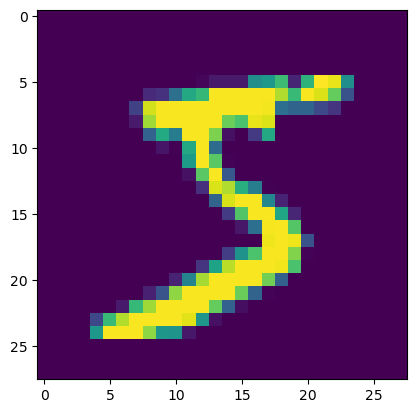

In [4]:
plt.imshow(Xtrain[0, :].reshape(28, 28))

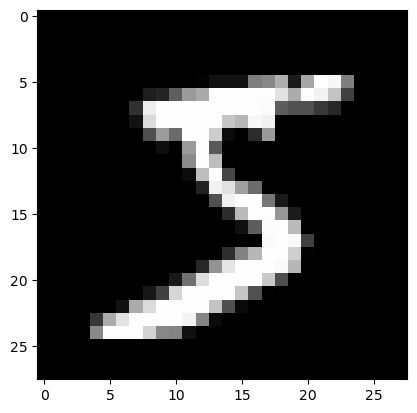

In [5]:
plt.imshow(Xtrain[0, :].reshape(28, 28), cmap='gray');

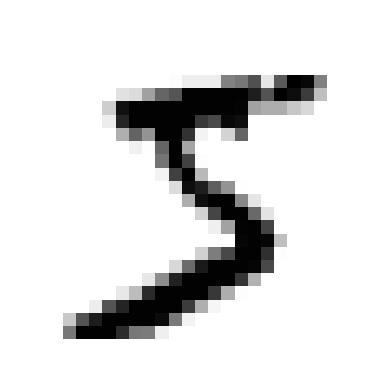

In [6]:
plt.imshow(-Xtrain[0, :].reshape(28, 28), cmap='gray')
plt.axis('off');

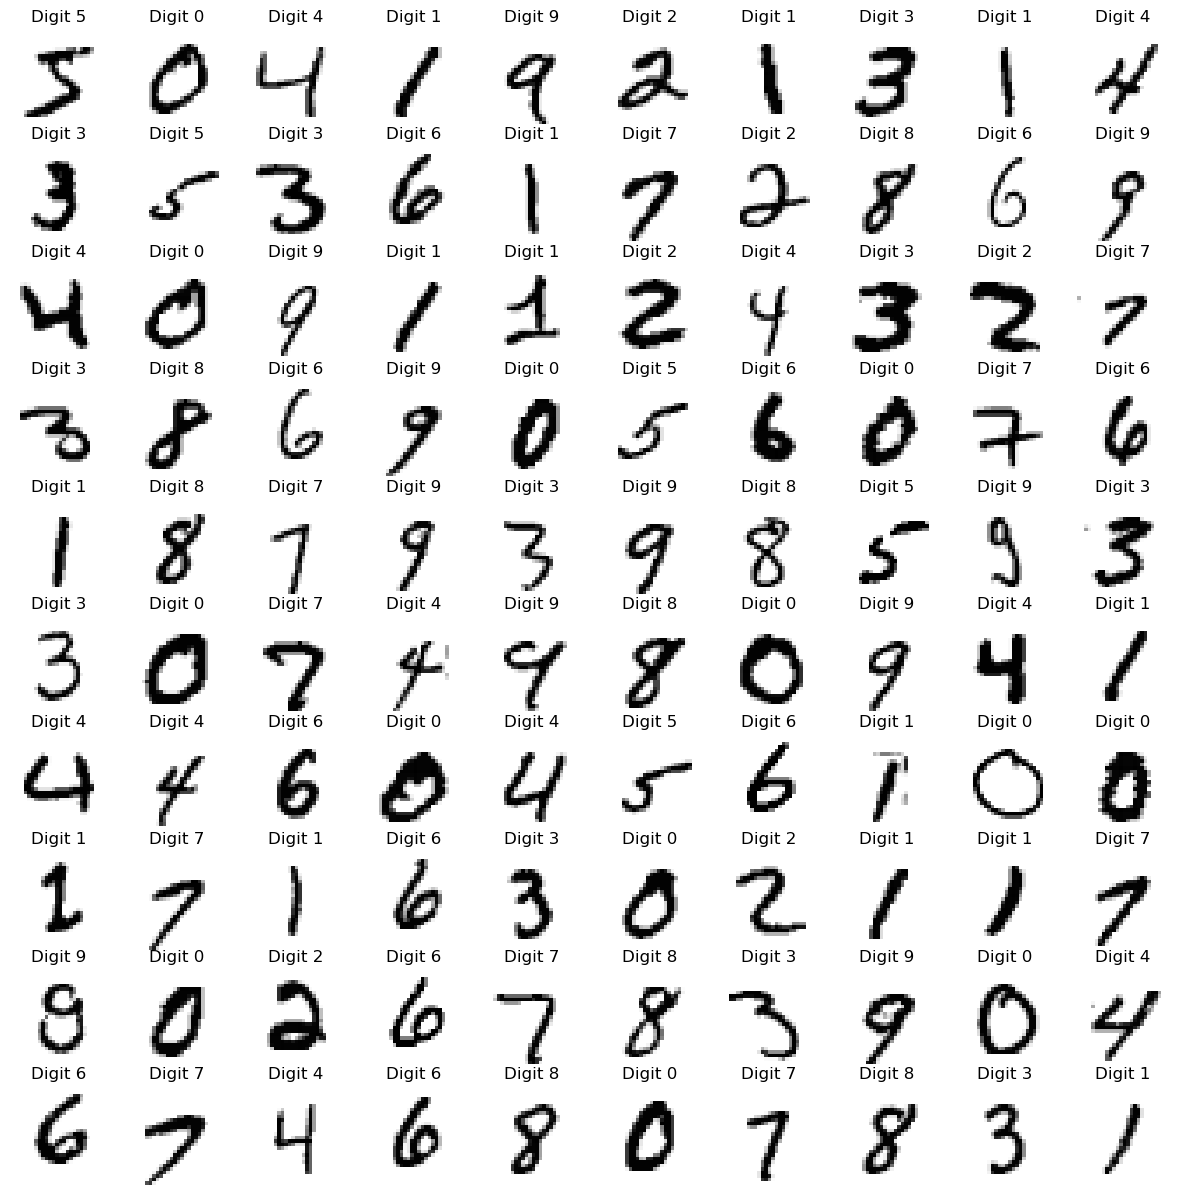

In [7]:
plt.figure(figsize=(15, 15))
for samplei in range(100):
    plt.subplot(10, 10, samplei+1)
    plt.imshow(-Xtrain[samplei, :].reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.title(f'Digit {Ttrain[samplei, 0]}')

In [9]:
from A4mysolution import *

In [10]:
n_inputs = Xtrain.shape[1]  # 784
hiddens = [20, 10]
classes = np.arange(10)

model = NeuralNetwork(n_inputs, hiddens, classes)
model

NeuralNetworkClassifier(784, [20, 10], [0 1 2 3 4 5 6 7 8 9])

In [ ]:
model.train(Xtrain, Ttrain, 100, 0.1)
model

/s/parsons/e/fac/anderson/cs345/notebooks/A4mysolution.py:97: RuntimeWarning: invalid value encountered in true_divide
  return (X - self.X_means) / self.X_stds


After modifying the `_standardize` function to be

```python
    def _standardize(self, X):
        if self.X_means is None:
            self.X_means = np.mean(X, axis=0)
            self.X_stds = np.std(X, axis=0)
            self.X_stds[self.X_stds == 0] = 1   # Added this line!
        return (X - self.X_means) / self.X_stds
```
and adding these two lines at end of epoch training loop

```python
            if (epoch + 1) % (n_epochs // 10) == 0:
                print(f'Epoch {epoch+1}: {self.percent_correct_trace[-1]:.2f}% correct')
```
and restarting the kernel and running all above cells...

In [35]:
model = NeuralNetwork(n_inputs, [20, 5], classes)
train_with_n = 10000
model.train(Xtrain[:train_with_n,:], Ttrain[:train_with_n, :], 200, 0.1)
model

Epoch 20: 67.54% correct
Epoch 40: 72.35% correct
Epoch 60: 78.23% correct
Epoch 80: 83.49% correct
Epoch 100: 86.73% correct
Epoch 120: 88.63% correct
Epoch 140: 90.05% correct
Epoch 160: 91.24% correct
Epoch 180: 91.98% correct
Epoch 200: 92.61% correct


NeuralNetworkClassifier(784, [20, 5], [0 1 2 3 4 5 6 7 8 9])

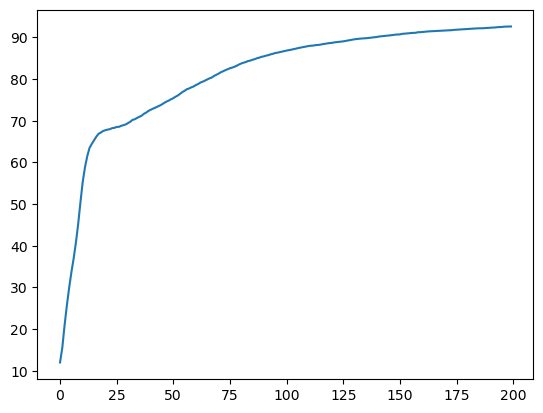

In [36]:
plt.plot(model.percent_correct_trace);

In [40]:
model.percent_correct(Ttest, model.use(Xtest)[0])

87.78

In [37]:
Ytest, _ = model.use(Xtest[:100, :])

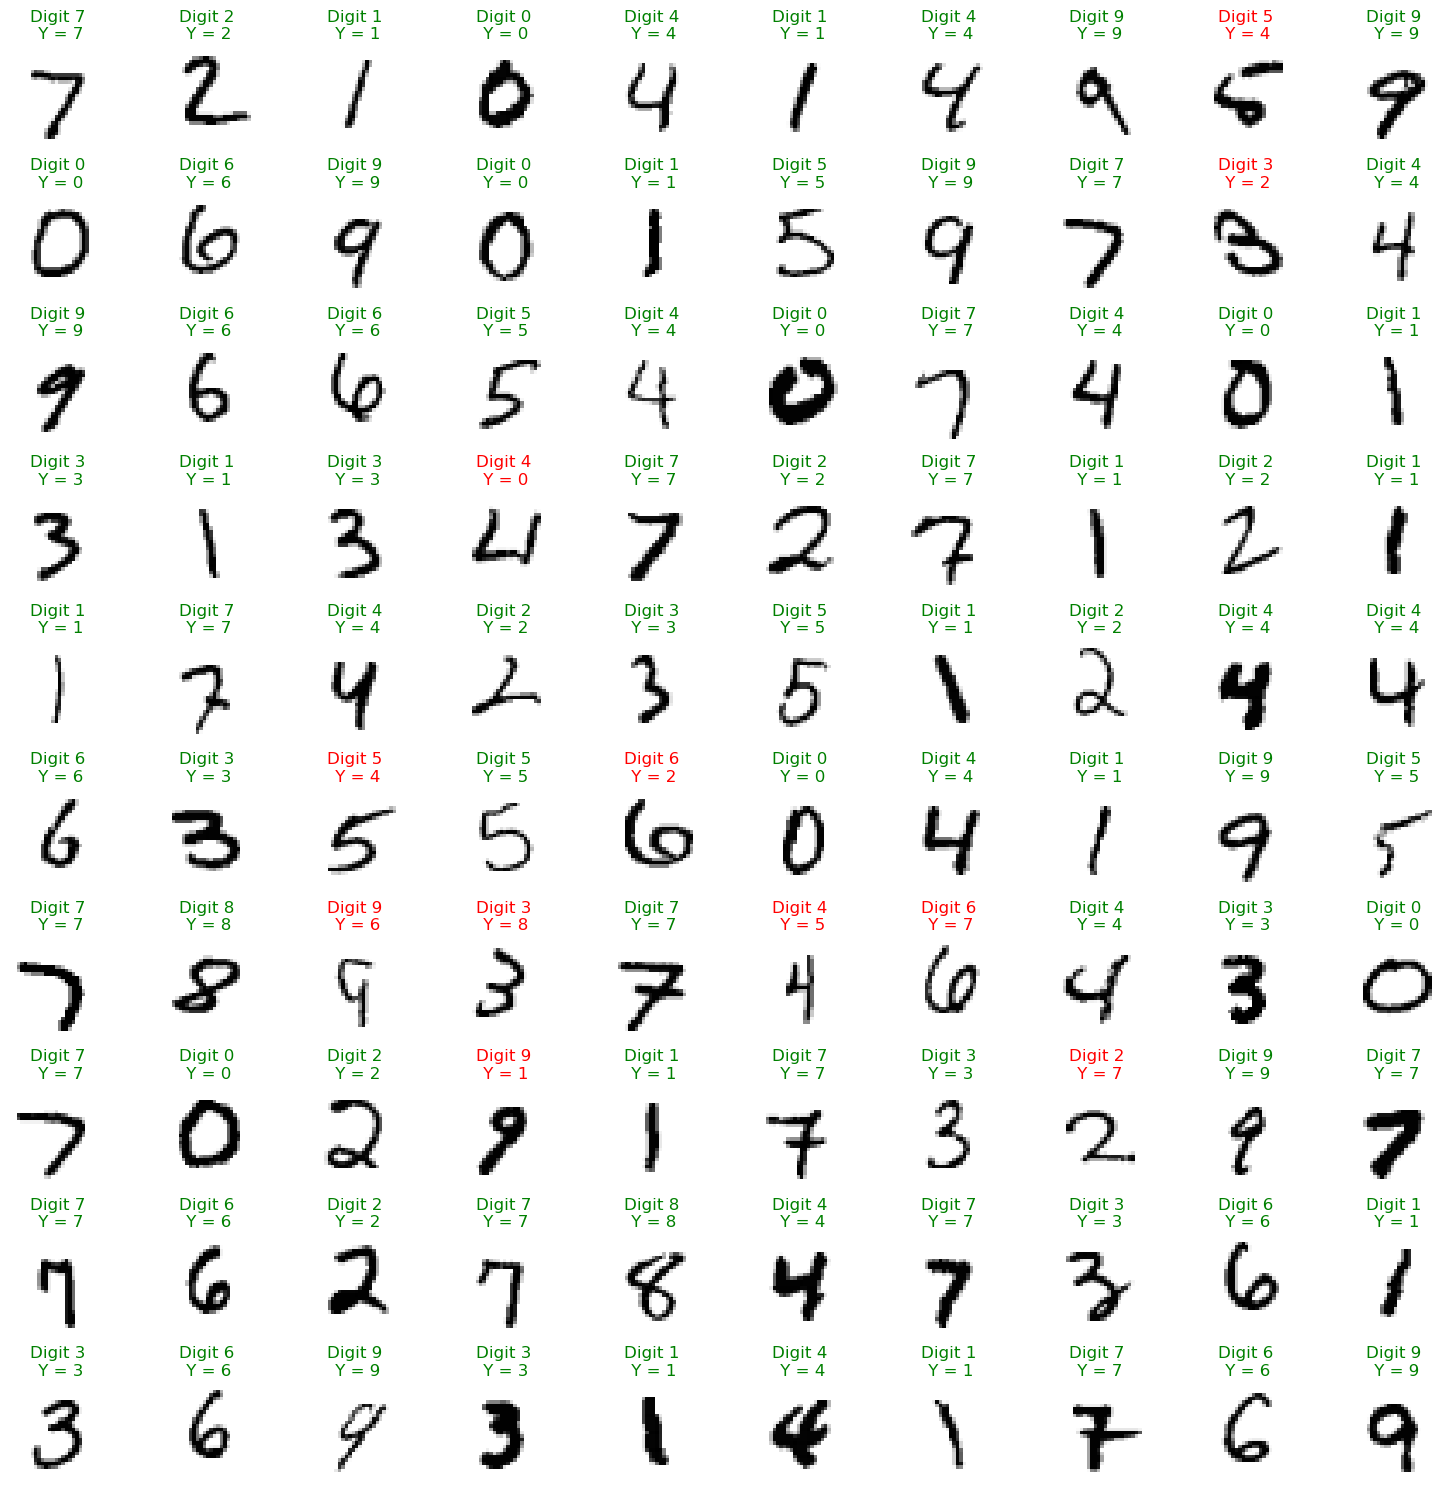

In [39]:
plt.figure(figsize=(15, 15))
for samplei in range(100):
    plt.subplot(10, 10, samplei+1)
    plt.imshow(-Xtest[samplei, :].reshape(28, 28), cmap='gray')
    plt.axis('off')
    T = Ttest[samplei, 0]
    Y = Ytest[samplei, 0]
    plt.title(f'Digit {T}\n Y = {Y}', color='r' if T != Y else 'g')
plt.tight_layout()